In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

In [2]:
df= pd.read_csv("train.csv")
x_test=pd.read_csv("test.csv")
y_test=pd.read_csv("sample_submission.csv")


In [3]:
df.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [4]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [5]:
x_test=x_test.drop("Alley",axis=1)
df=df.drop("Alley",axis=1)
x_test=x_test.drop("MiscFeature",axis=1)
df=df.drop("MiscFeature",axis=1)
x_test=x_test.drop("FireplaceQu",axis=1)
df=df.drop("FireplaceQu",axis=1)
x_test=x_test.drop("PoolQC",axis=1)
df=df.drop("PoolQC",axis=1)
x_test=x_test.drop("Fence",axis=1)
df=df.drop("Fence",axis=1)


In [6]:

null_values=df.isnull().sum()

In [7]:
for column, count in null_values.items():
    print(f"Column '{column}': {count} null values")

Column 'Id': 0 null values
Column 'MSSubClass': 0 null values
Column 'MSZoning': 0 null values
Column 'LotFrontage': 259 null values
Column 'LotArea': 0 null values
Column 'Street': 0 null values
Column 'LotShape': 0 null values
Column 'LandContour': 0 null values
Column 'Utilities': 0 null values
Column 'LotConfig': 0 null values
Column 'LandSlope': 0 null values
Column 'Neighborhood': 0 null values
Column 'Condition1': 0 null values
Column 'Condition2': 0 null values
Column 'BldgType': 0 null values
Column 'HouseStyle': 0 null values
Column 'OverallQual': 0 null values
Column 'OverallCond': 0 null values
Column 'YearBuilt': 0 null values
Column 'YearRemodAdd': 0 null values
Column 'RoofStyle': 0 null values
Column 'RoofMatl': 0 null values
Column 'Exterior1st': 0 null values
Column 'Exterior2nd': 0 null values
Column 'MasVnrType': 872 null values
Column 'MasVnrArea': 8 null values
Column 'ExterQual': 0 null values
Column 'ExterCond': 0 null values
Column 'Foundation': 0 null values
C

## Encoding  text data using labelencoder to get them as integer

In [9]:
label_encoder = LabelEncoder()
object_columns = df.select_dtypes(include='object').columns
object_columnsx_test = x_test.select_dtypes(include='object').columns
int_columns=df.select_dtypes(include=['int64','float64']).columns
int_columns_test=x_test.select_dtypes(include=['int64','float64']).columns
for column in object_columns:
    df[column] = label_encoder.fit_transform(df[column])
for column in object_columnsx_test:
    x_test[column] = label_encoder.fit_transform(x_test[column])


## filling null values

In [10]:

for i in object_columns:
    df[i].fillna(df[i].mode(), inplace=True)

for i in object_columnsx_test:
    x_test[i].fillna(x_test[i].mode(), inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   int32  
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   int32  
 6   LotShape       1460 non-null   int32  
 7   LandContour    1460 non-null   int32  
 8   Utilities      1460 non-null   int32  
 9   LotConfig      1460 non-null   int32  
 10  LandSlope      1460 non-null   int32  
 11  Neighborhood   1460 non-null   int32  
 12  Condition1     1460 non-null   int32  
 13  Condition2     1460 non-null   int32  
 14  BldgType       1460 non-null   int32  
 15  HouseStyle     1460 non-null   int32  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [12]:
for column, count in null_values.items():
    print(f"Column '{column}': {count} null values")

Column 'Id': 0 null values
Column 'MSSubClass': 0 null values
Column 'MSZoning': 0 null values
Column 'LotFrontage': 259 null values
Column 'LotArea': 0 null values
Column 'Street': 0 null values
Column 'LotShape': 0 null values
Column 'LandContour': 0 null values
Column 'Utilities': 0 null values
Column 'LotConfig': 0 null values
Column 'LandSlope': 0 null values
Column 'Neighborhood': 0 null values
Column 'Condition1': 0 null values
Column 'Condition2': 0 null values
Column 'BldgType': 0 null values
Column 'HouseStyle': 0 null values
Column 'OverallQual': 0 null values
Column 'OverallCond': 0 null values
Column 'YearBuilt': 0 null values
Column 'YearRemodAdd': 0 null values
Column 'RoofStyle': 0 null values
Column 'RoofMatl': 0 null values
Column 'Exterior1st': 0 null values
Column 'Exterior2nd': 0 null values
Column 'MasVnrType': 872 null values
Column 'MasVnrArea': 8 null values
Column 'ExterQual': 0 null values
Column 'ExterCond': 0 null values
Column 'Foundation': 0 null values
C

In [13]:
for i in int_columns:
    df[i].fillna(df[i].mean(), inplace=True)
for i in int_columns_test:
    x_test[i].fillna(x_test[i].mean(), inplace=True)

In [14]:
null_values=df.isnull().sum()
for column, count in null_values.items():
    print(f"Column '{column}': {count} null values")

Column 'Id': 0 null values
Column 'MSSubClass': 0 null values
Column 'MSZoning': 0 null values
Column 'LotFrontage': 0 null values
Column 'LotArea': 0 null values
Column 'Street': 0 null values
Column 'LotShape': 0 null values
Column 'LandContour': 0 null values
Column 'Utilities': 0 null values
Column 'LotConfig': 0 null values
Column 'LandSlope': 0 null values
Column 'Neighborhood': 0 null values
Column 'Condition1': 0 null values
Column 'Condition2': 0 null values
Column 'BldgType': 0 null values
Column 'HouseStyle': 0 null values
Column 'OverallQual': 0 null values
Column 'OverallCond': 0 null values
Column 'YearBuilt': 0 null values
Column 'YearRemodAdd': 0 null values
Column 'RoofStyle': 0 null values
Column 'RoofMatl': 0 null values
Column 'Exterior1st': 0 null values
Column 'Exterior2nd': 0 null values
Column 'MasVnrType': 0 null values
Column 'MasVnrArea': 0 null values
Column 'ExterQual': 0 null values
Column 'ExterCond': 0 null values
Column 'Foundation': 0 null values
Colum

## Scaling

In [15]:
X=df.drop(columns='SalePrice')
Y_train=df['SalePrice']
y_test=y_test.drop(columns='Id')

In [17]:
std=StandardScaler()
x_train=std.fit_transform(X)
x_test=std.fit_transform(x_test)
x_train

array([[-1.73086488,  0.07337496, -0.04553194, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       [-1.7284922 , -0.87256276, -0.04553194, ..., -0.61443862,
         0.31386709,  0.2085023 ],
       [-1.72611953,  0.07337496, -0.04553194, ...,  0.13877749,
         0.31386709,  0.2085023 ],
       ...,
       [ 1.72611953,  0.30985939, -0.04553194, ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [ 1.7284922 , -0.87256276, -0.04553194, ...,  1.64520971,
         0.31386709,  0.2085023 ],
       [ 1.73086488, -0.87256276, -0.04553194, ...,  0.13877749,
         0.31386709,  0.2085023 ]])

## making our model

In [19]:
knnregressor=KNeighborsRegressor(n_neighbors=21)

In [20]:
knnregressor.fit(x_train,Y_train)

KNeighborsRegressor(n_neighbors=21)

In [21]:
y_pred=knnregressor.predict(x_test)


## visualisation of data

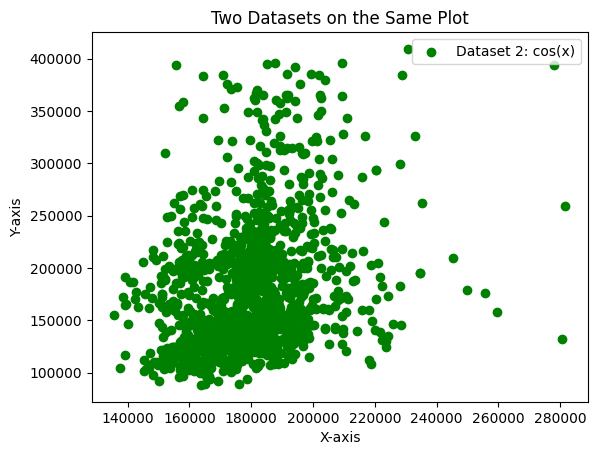

In [22]:
plt.scatter(y_test, y_pred, label='Dataset 2: cos(x)', color='green')

# Adding labels and title
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Two Datasets on the Same Plot')

# Adding a legend to differentiate between datasets
plt.legend()

# Display the plot
plt.show()


In [23]:
y_test=np.resize(y_test,(1459,))

## calculating error

In [24]:
error=(y_pred-y_test)
error=np.abs(error)
mean_error=np.mean(error)
mean_error
mean_ytest=np.mean(y_test)
real_error=(mean_error/mean_ytest)*100
real_error

25.819768509331258

## getting relation between data


In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


In [26]:
correlation_matrix = df.corr()
sale_price_correlation = correlation_matrix['SalePrice'].abs().sort_values(ascending=False)
print(sale_price_correlation)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
ExterQual        0.636884
GarageArea       0.623431
BsmtQual         0.620886
TotalBsmtSF      0.613581
1stFlrSF         0.605852
KitchenQual      0.589189
FullBath         0.560664
GarageFinish     0.549247
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
GarageType       0.415283
HeatingQC        0.400178
BsmtFinSF1       0.386420
Foundation       0.382479
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
BsmtExposure     0.309043
HalfBath         0.284108
MasVnrType       0.281554
LotArea          0.263843
LotShape         0.255580
CentralAir       0.251328
Electrical       0.234716
PavedDrive       0.231357
BsmtFullBath     0.227122
RoofStyle        0.222405
BsmtUnfSF        0.214479
SaleCondition    0.213092
Neighborhood

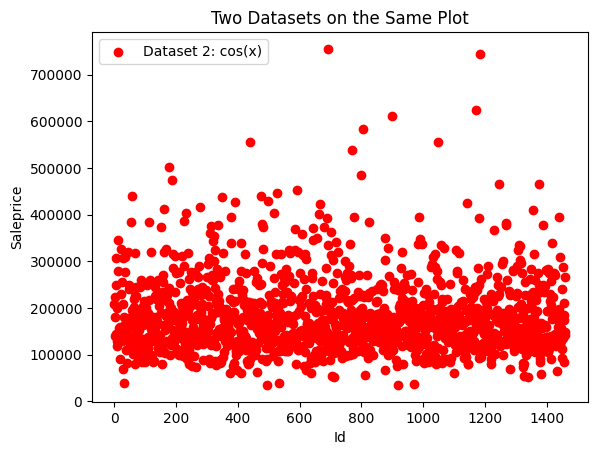

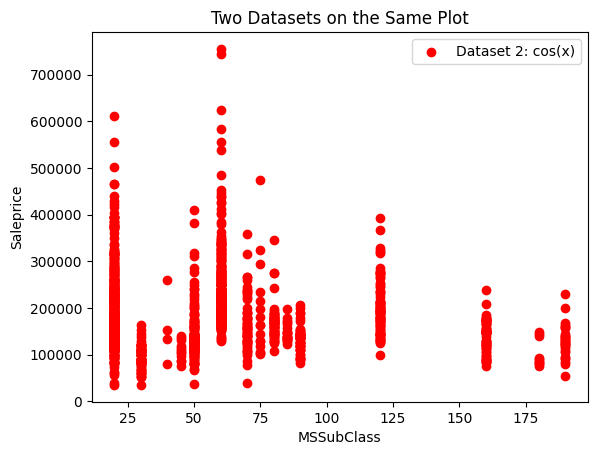

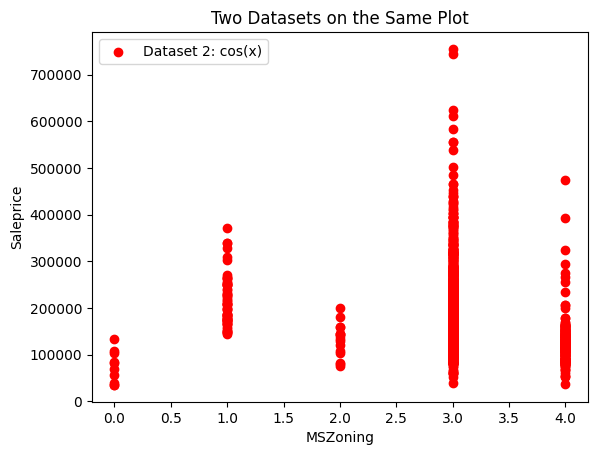

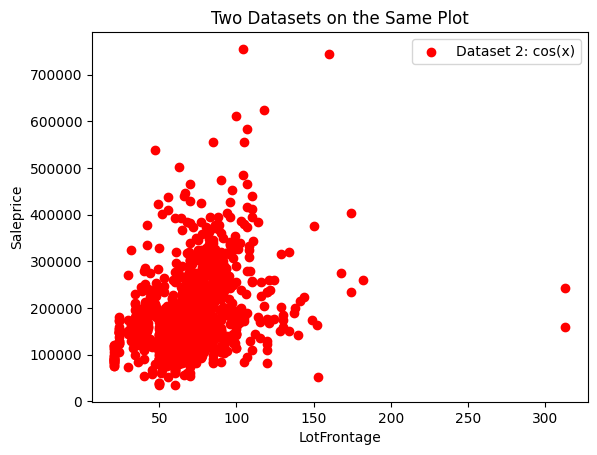

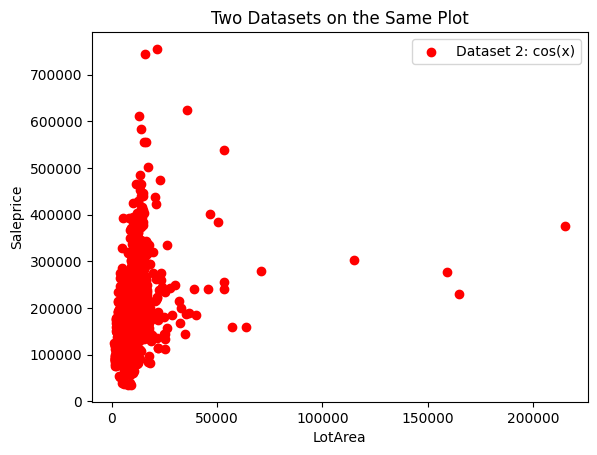

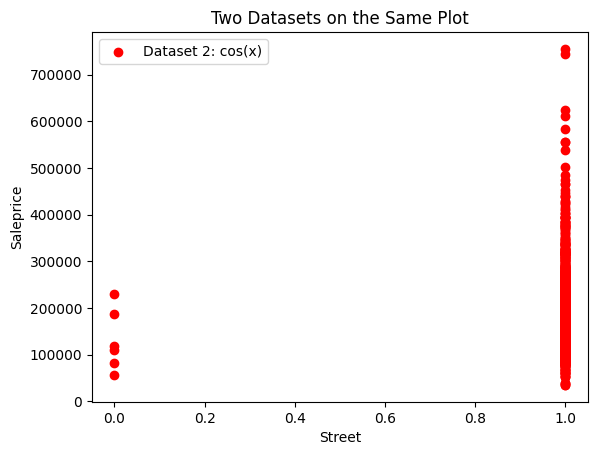

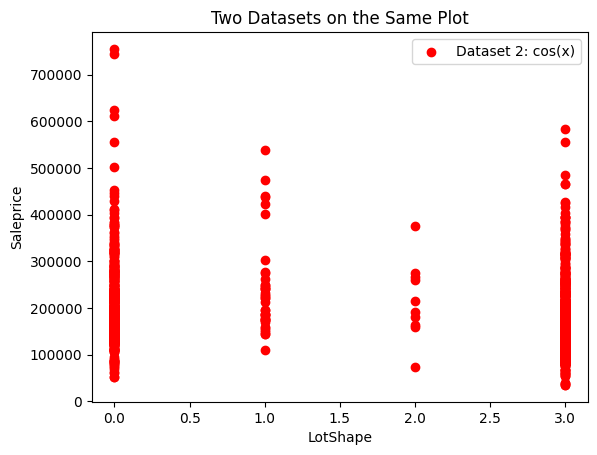

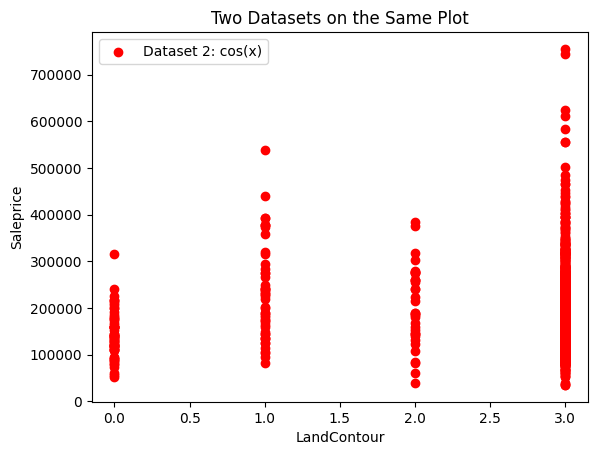

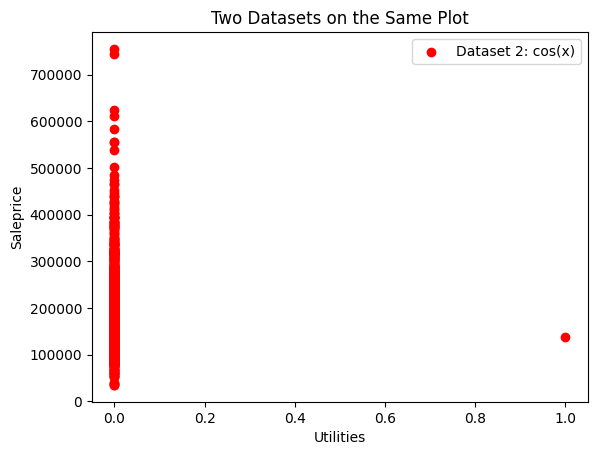

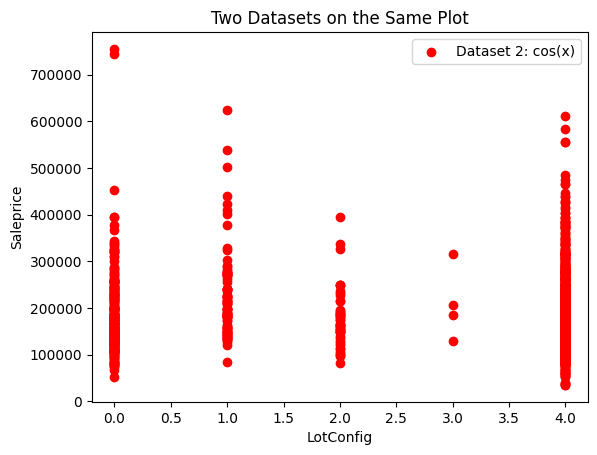

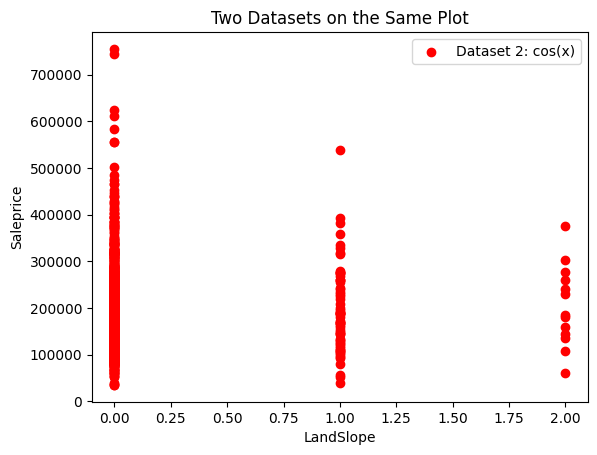

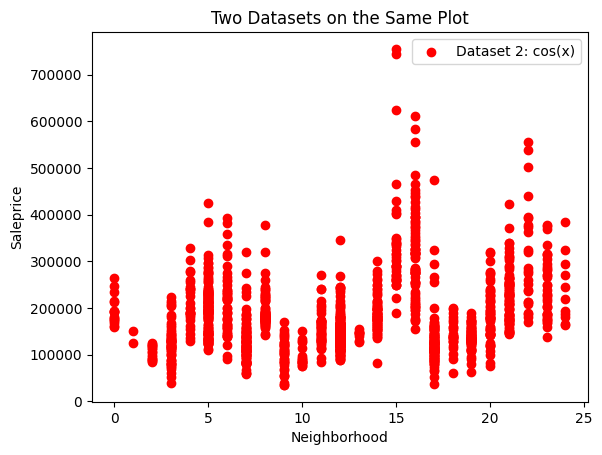

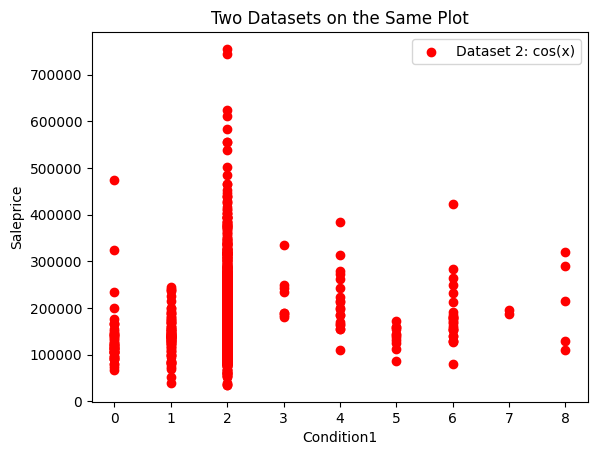

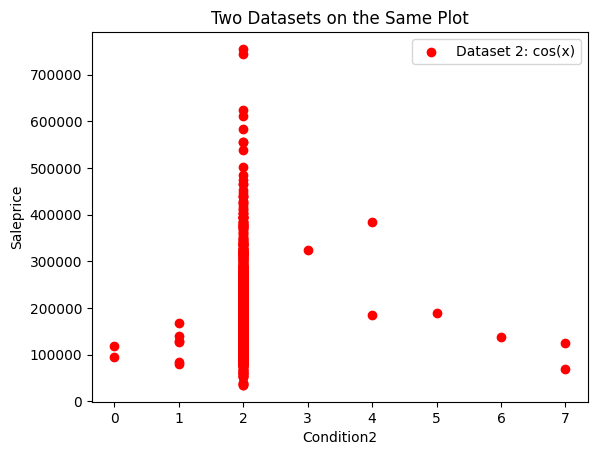

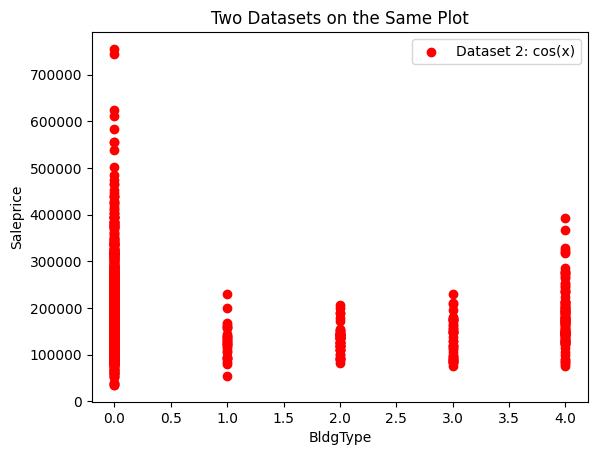

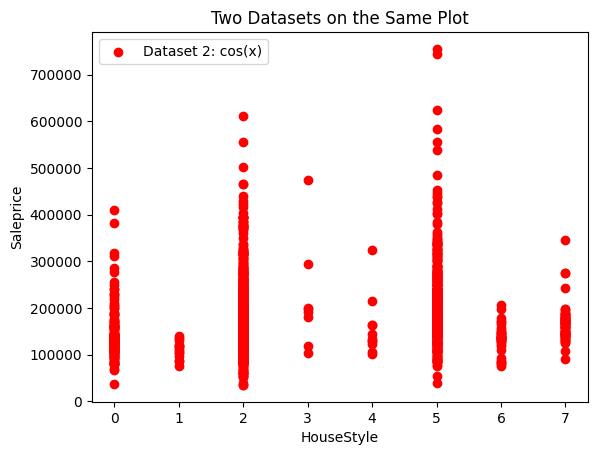

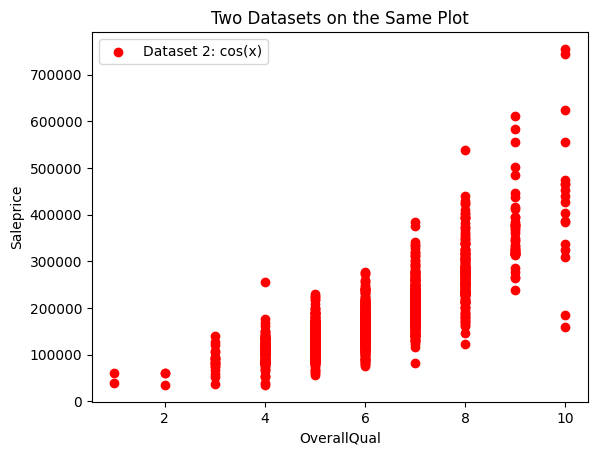

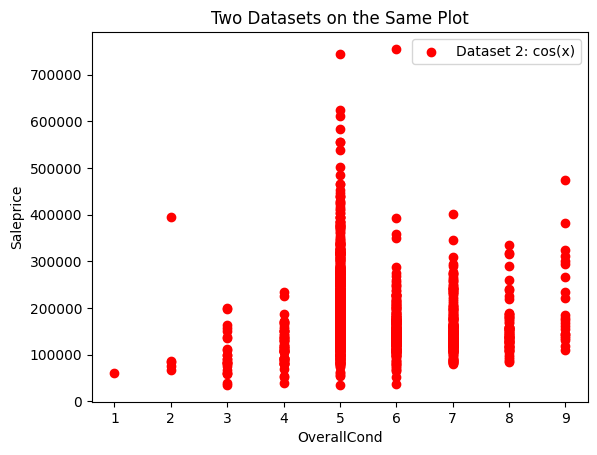

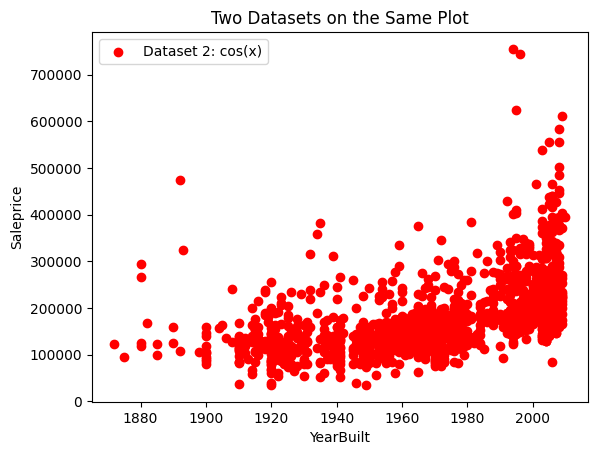

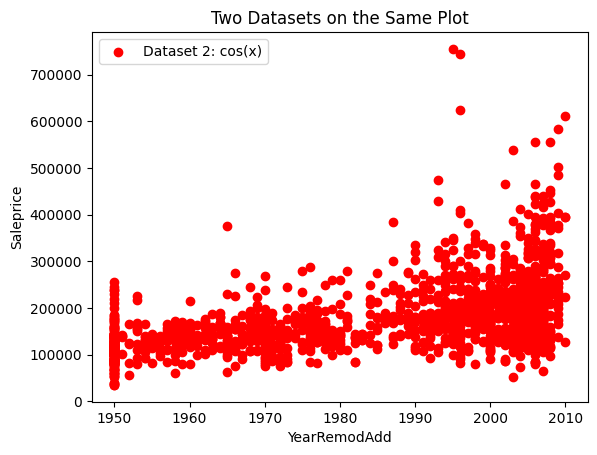

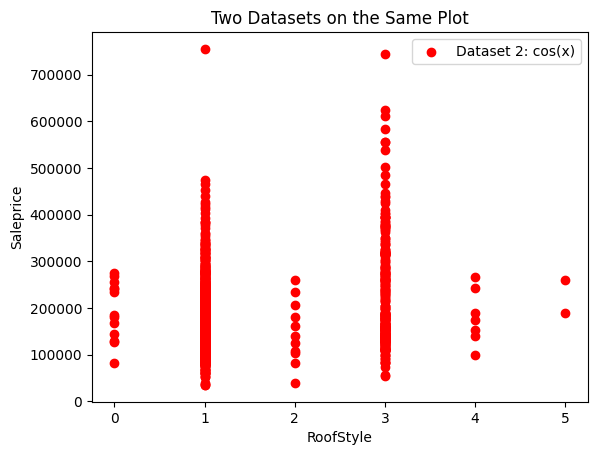

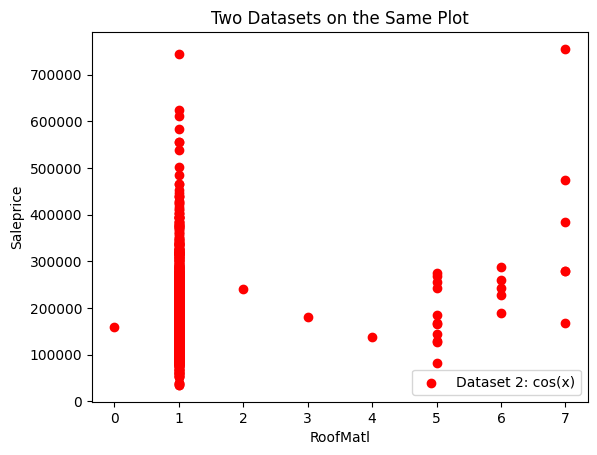

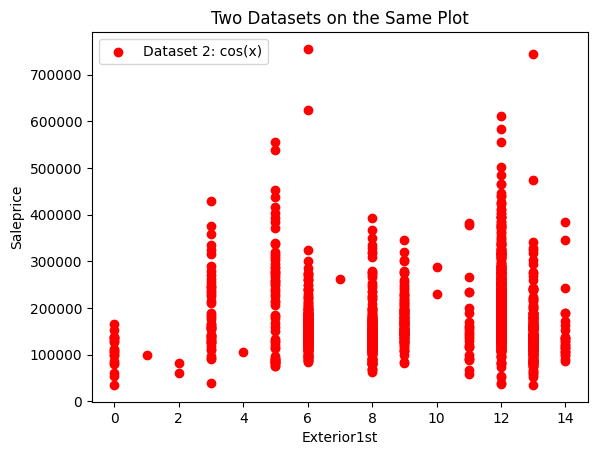

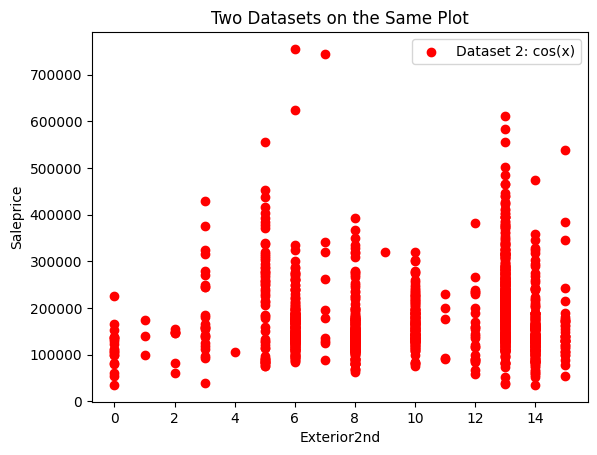

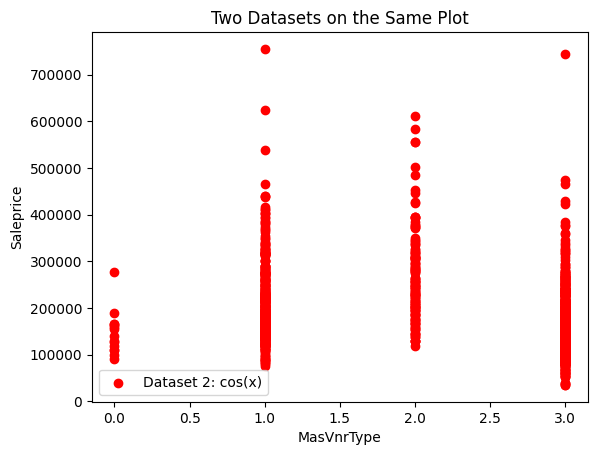

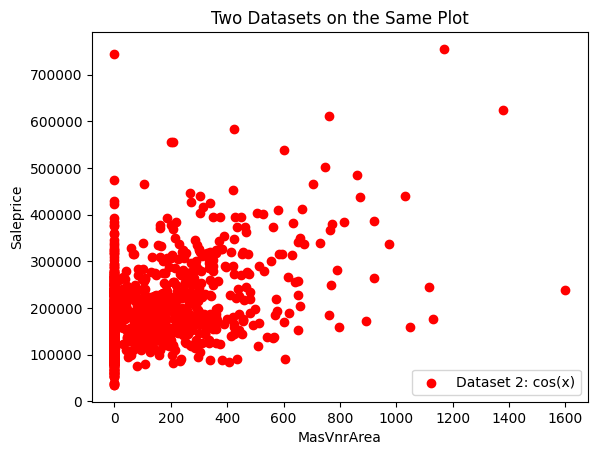

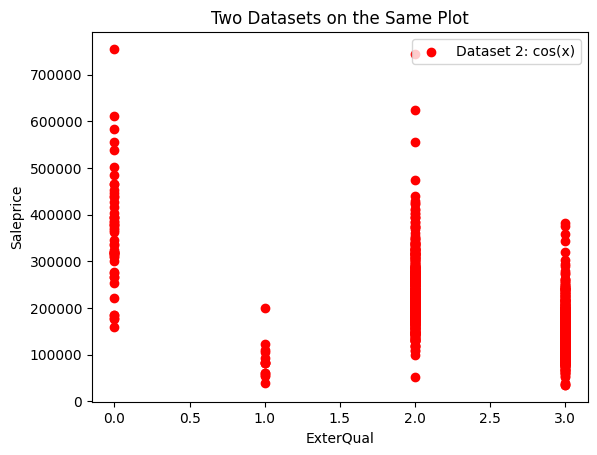

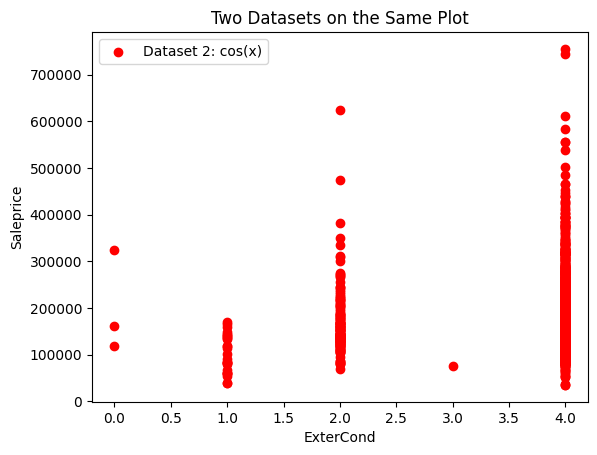

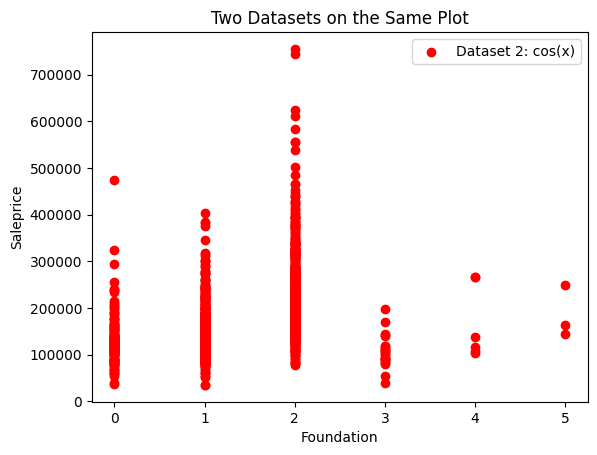

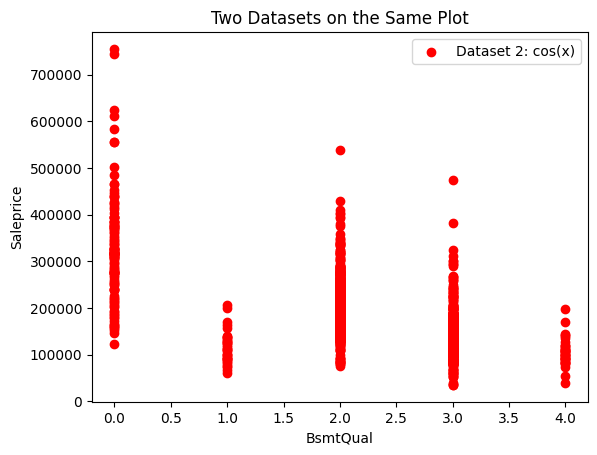

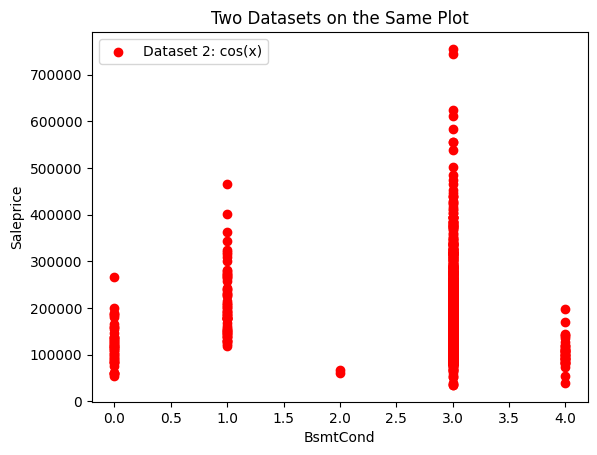

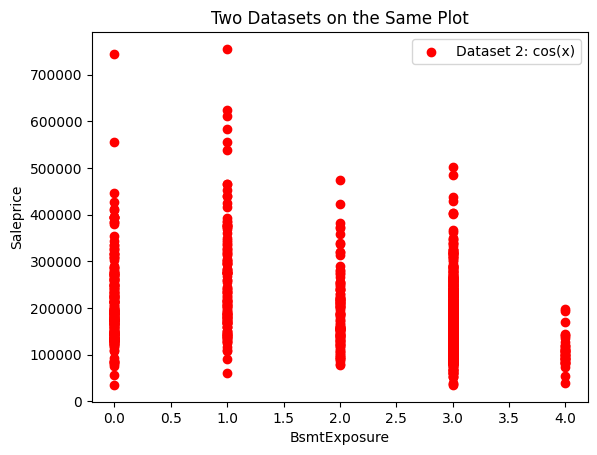

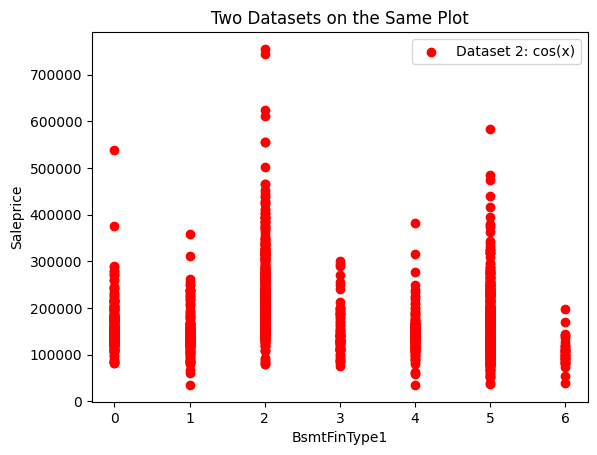

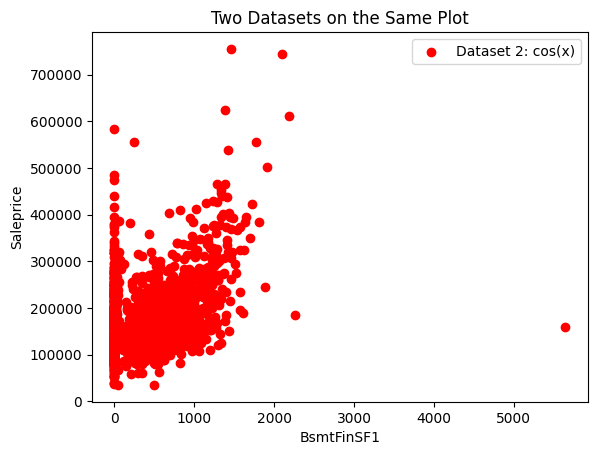

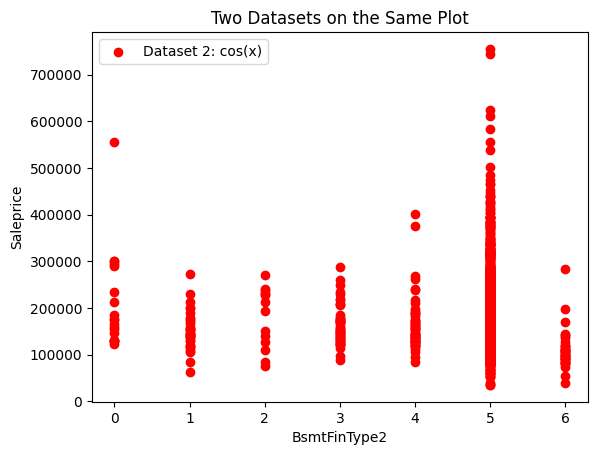

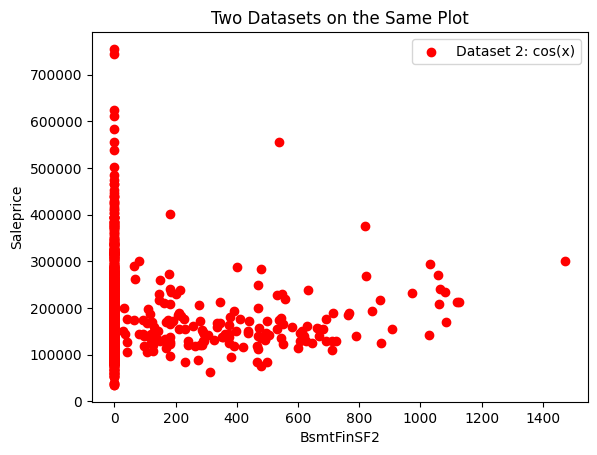

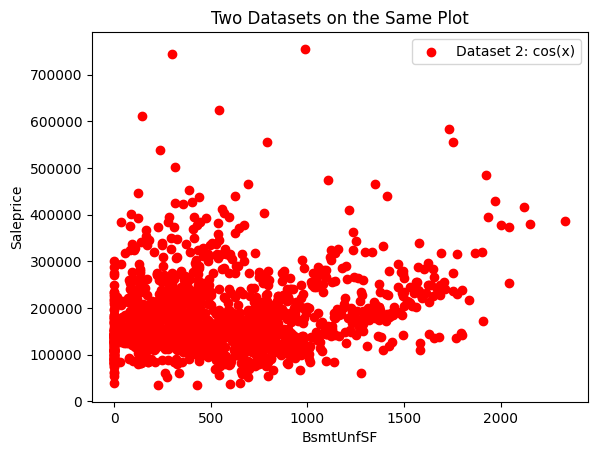

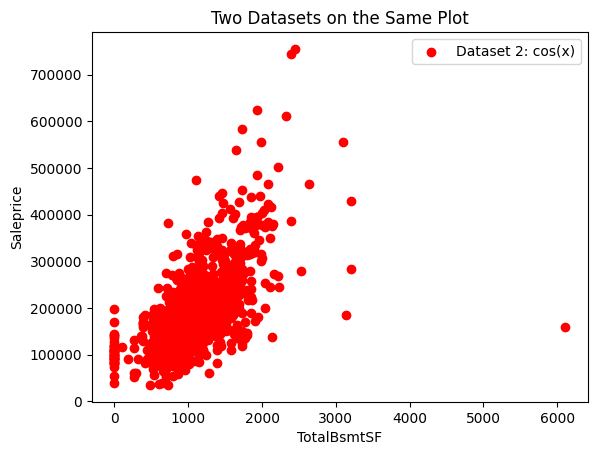

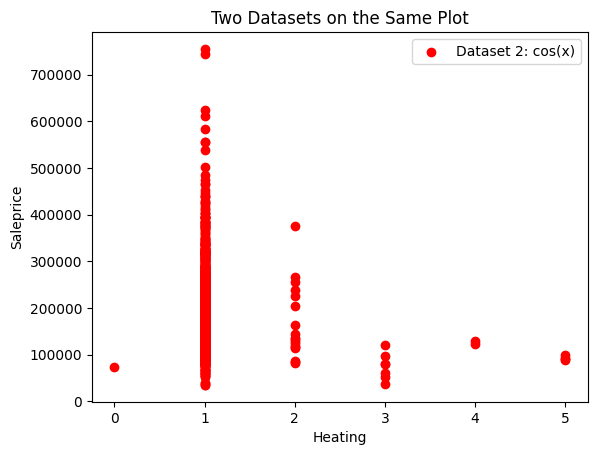

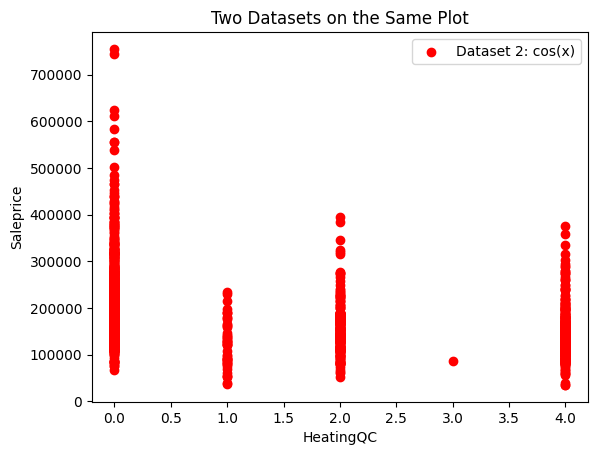

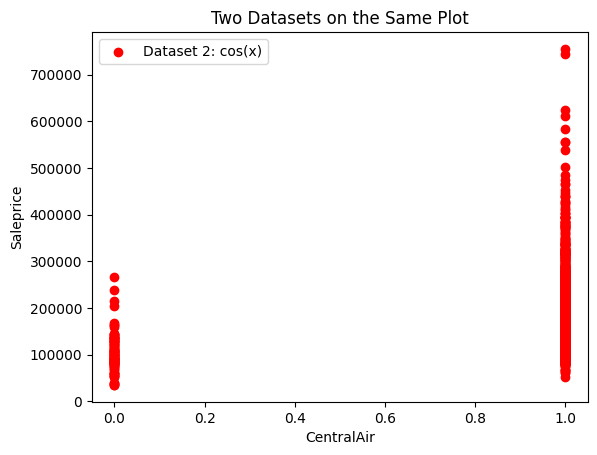

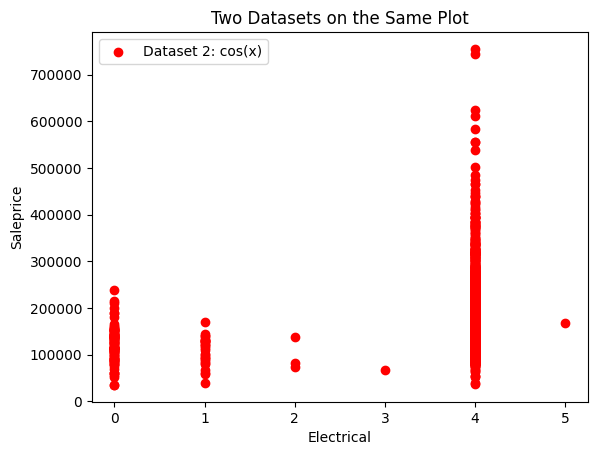

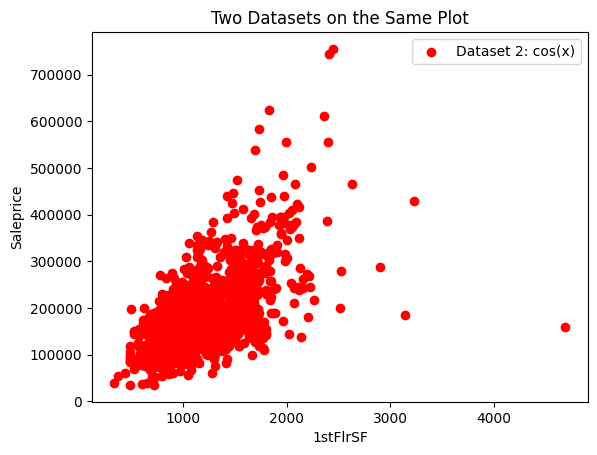

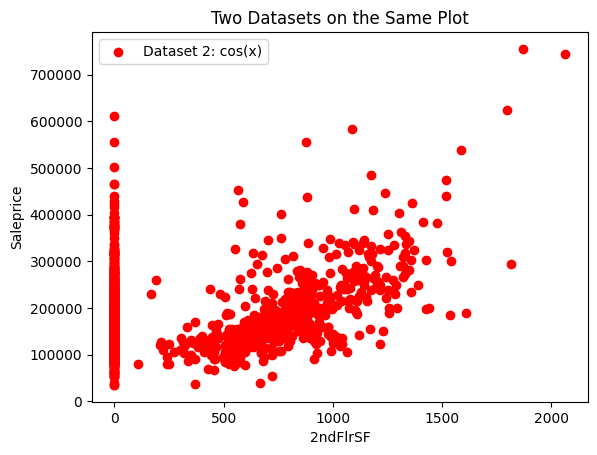

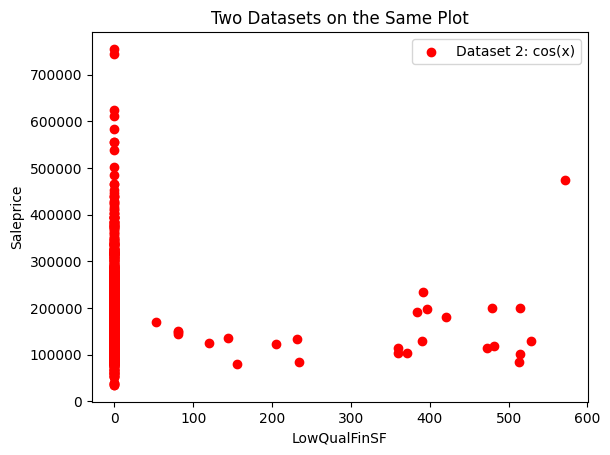

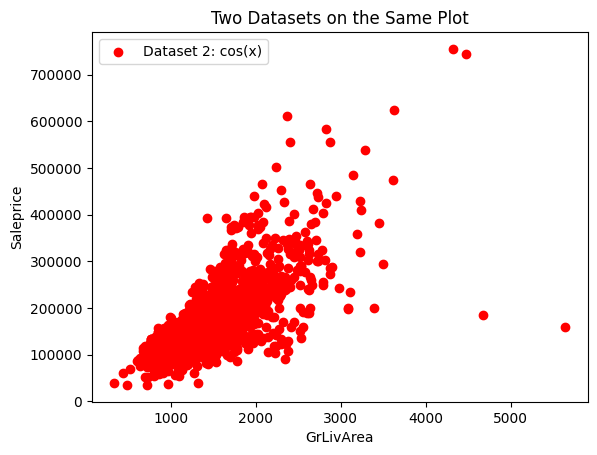

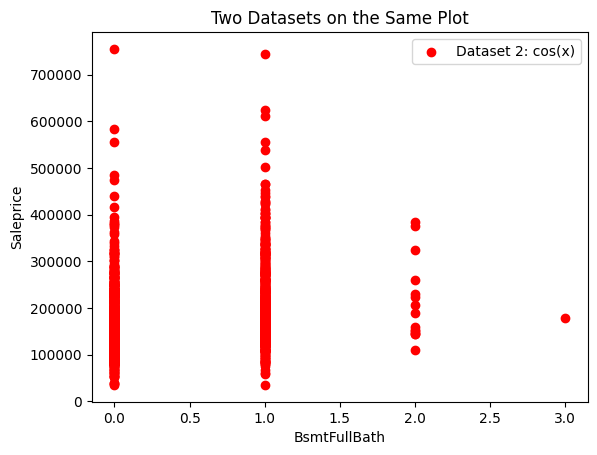

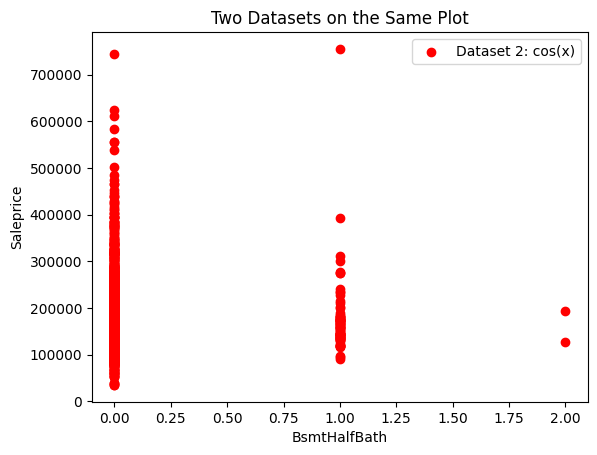

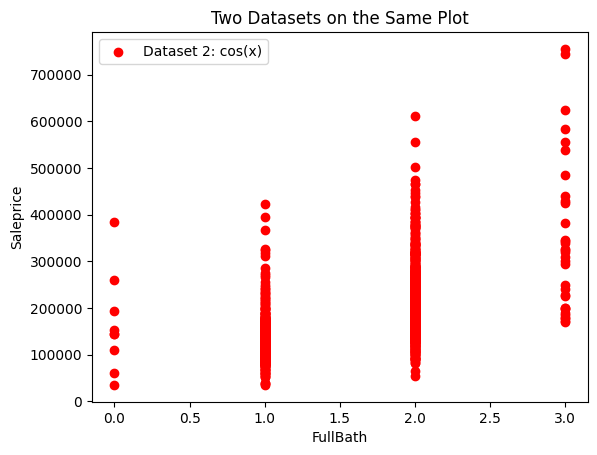

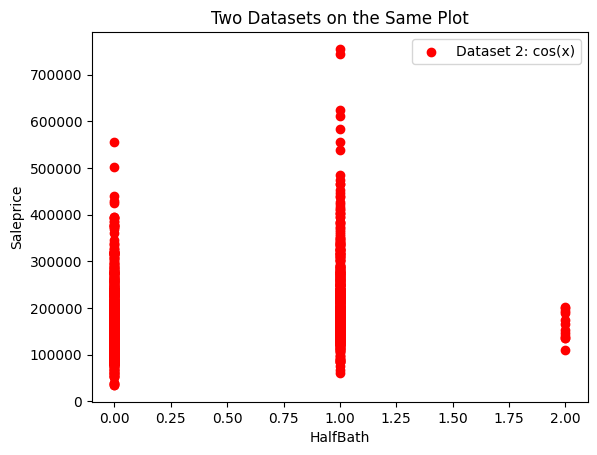

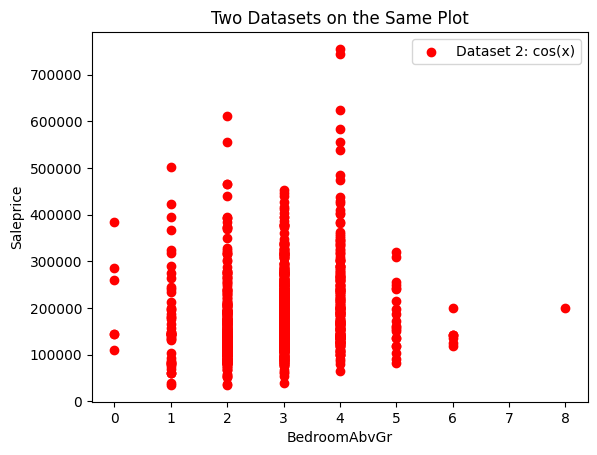

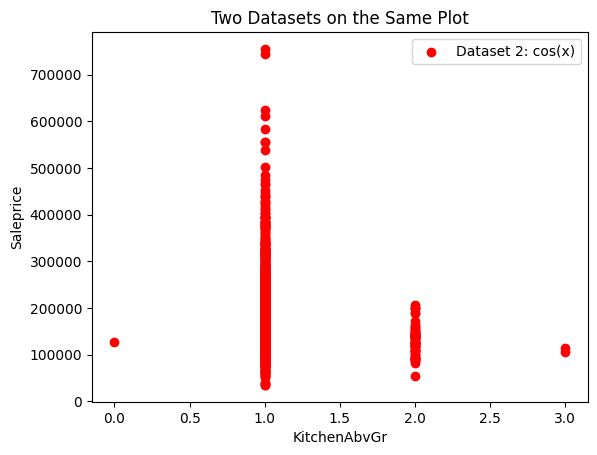

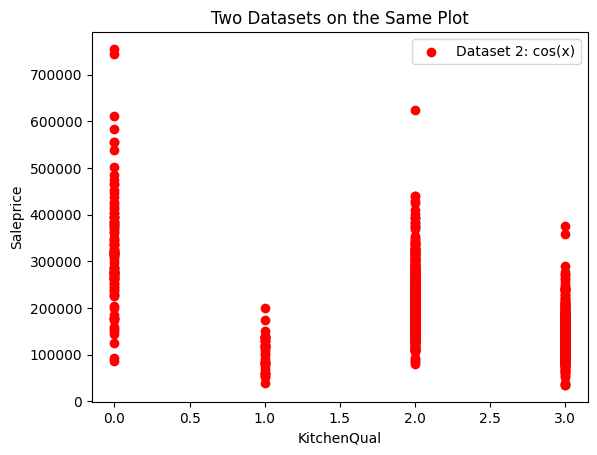

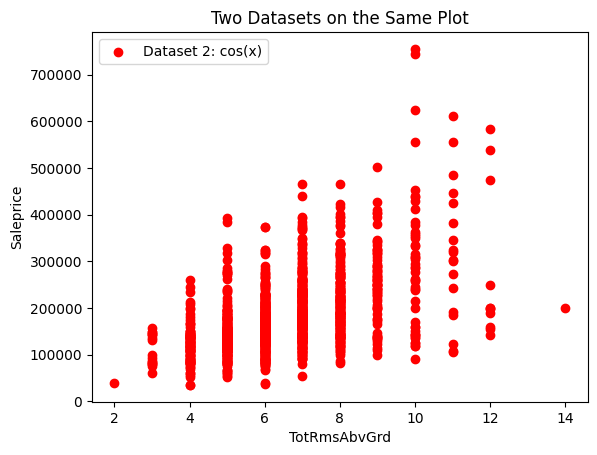

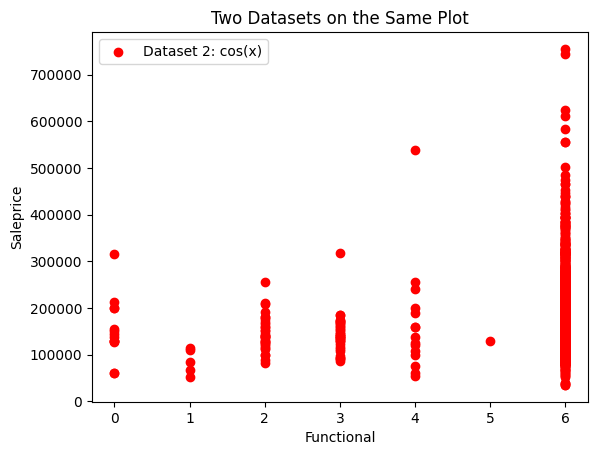

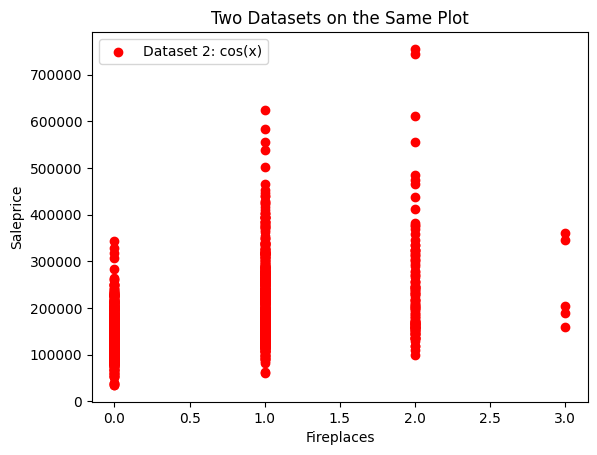

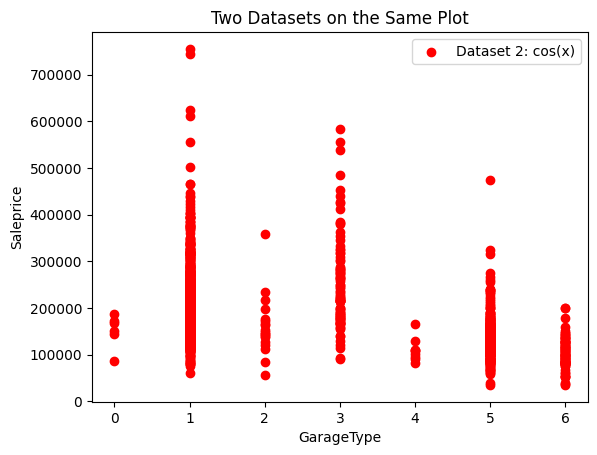

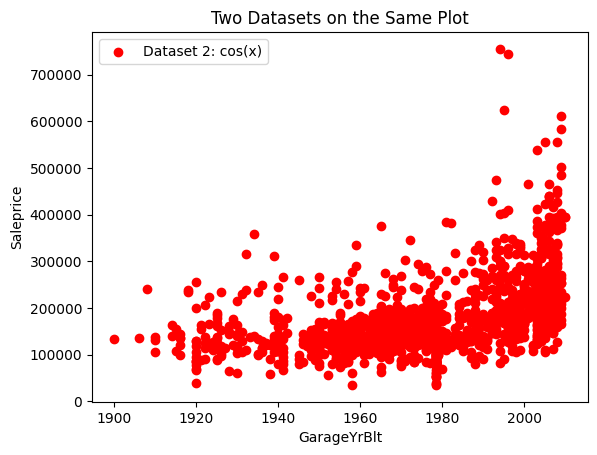

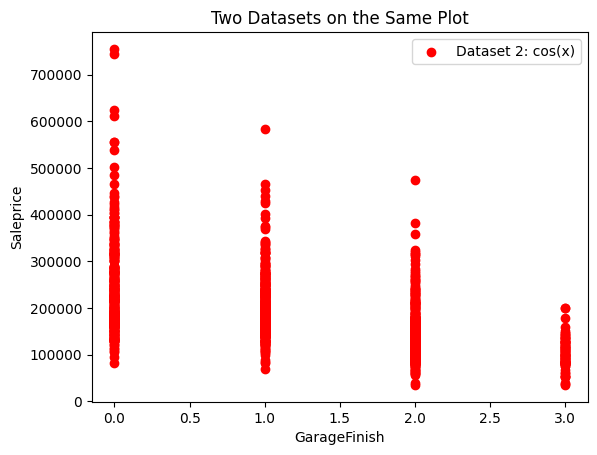

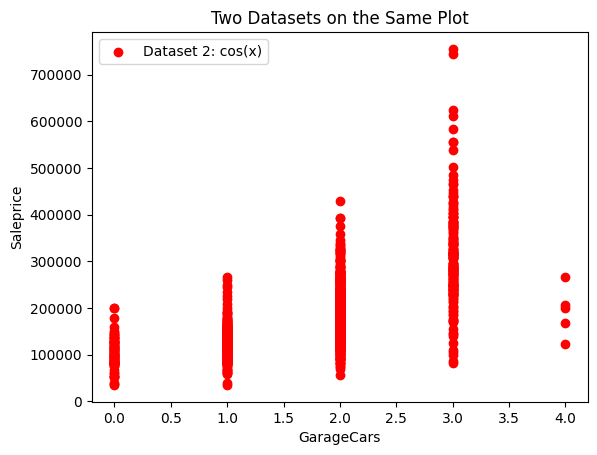

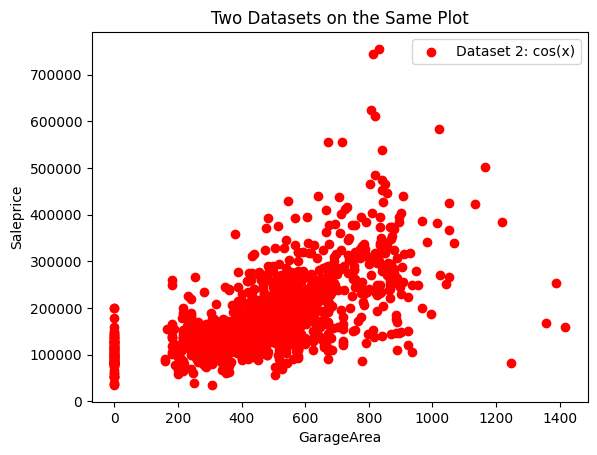

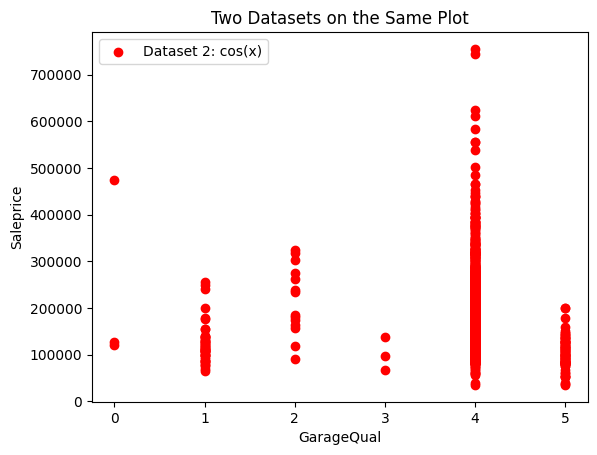

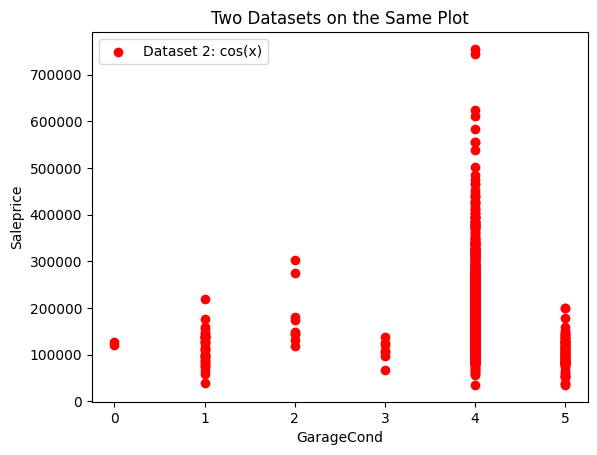

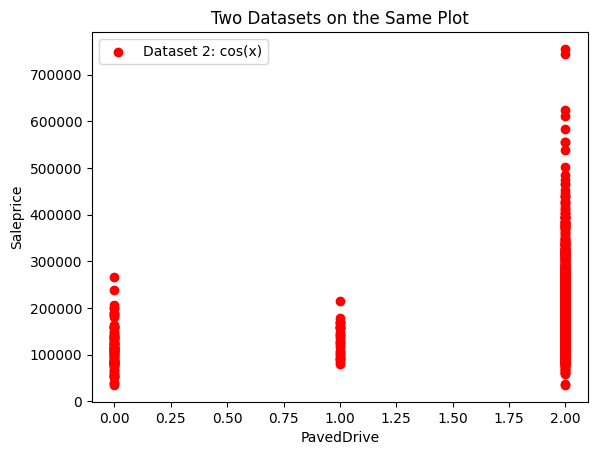

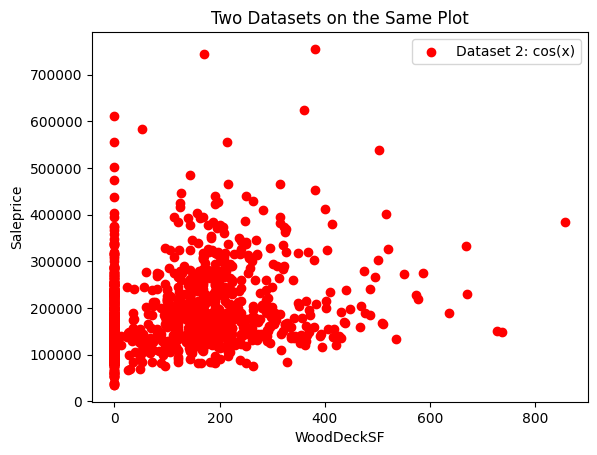

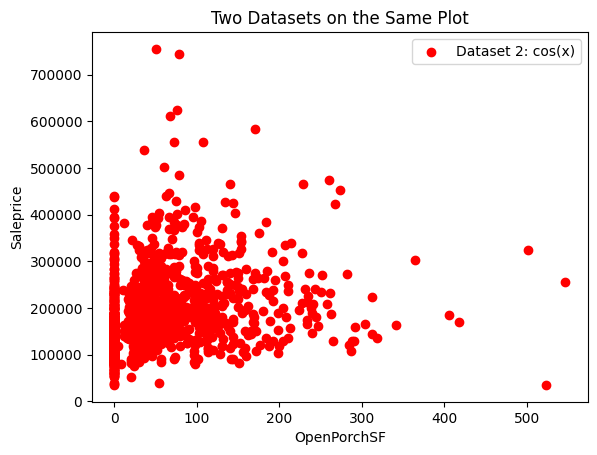

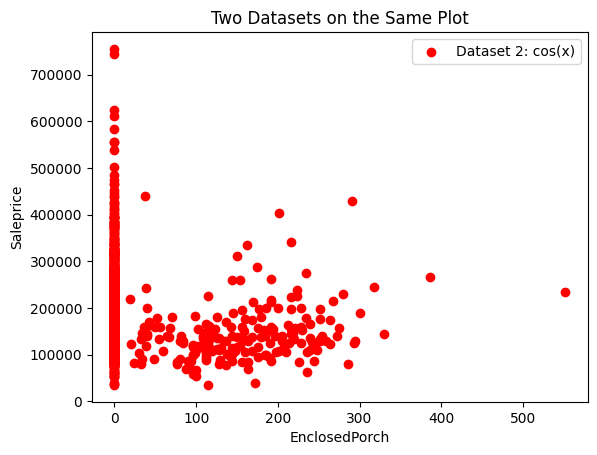

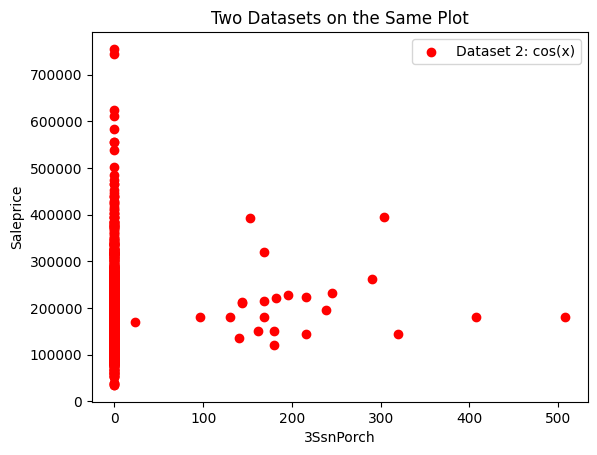

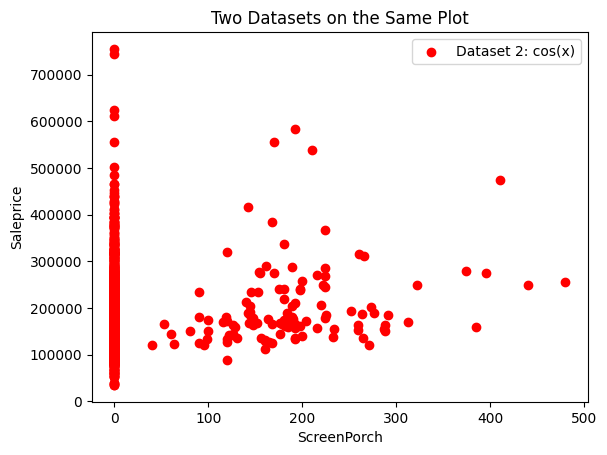

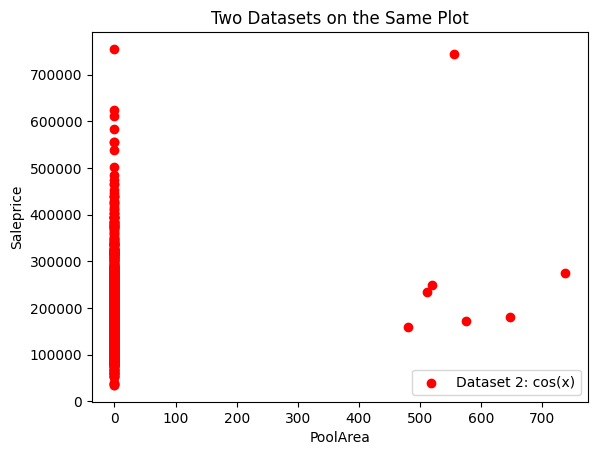

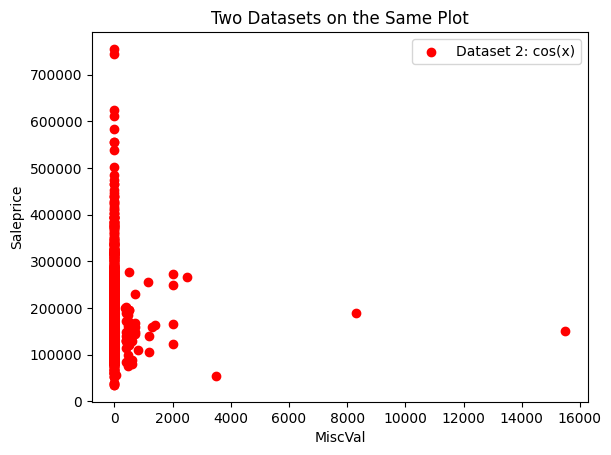

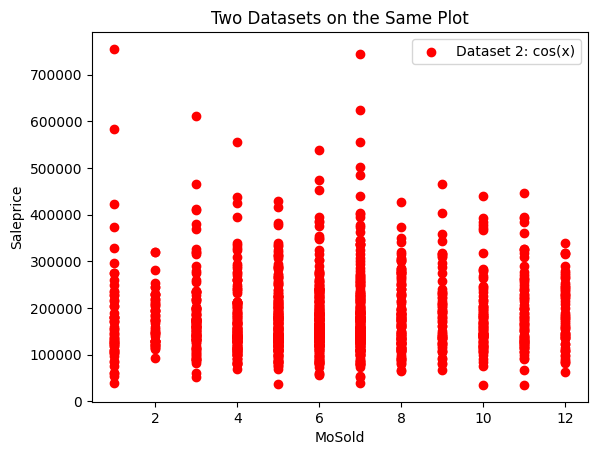

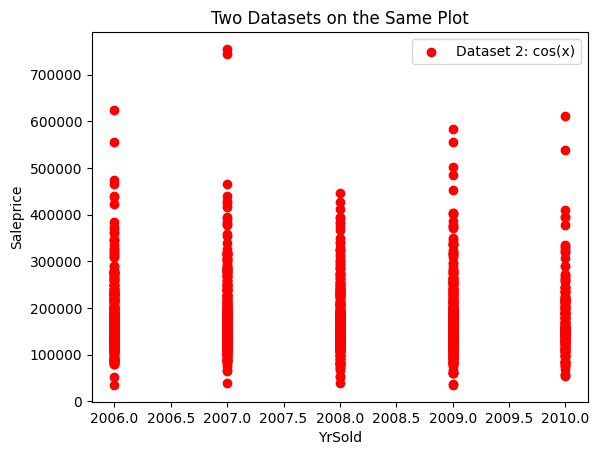

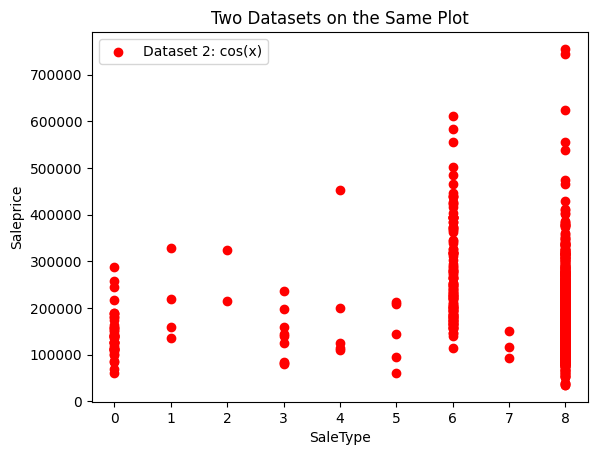

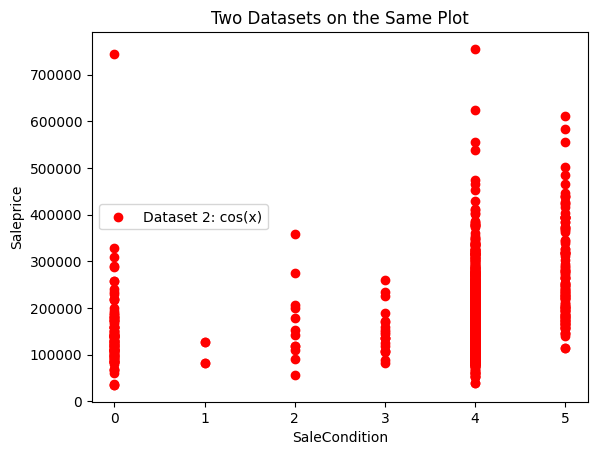

In [27]:
for i in range(0,75):
    plt.scatter(df.iloc[:, i], df.iloc[:, 75], label='Dataset 2: cos(x)', color='red')


# Adding labels and title
    plt.xlabel(df.columns[i])
    plt.ylabel('Saleprice')
    plt.title('Two Datasets on the Same Plot')

# Adding a legend to differentiate between datasets
    plt.legend()

# Display the plot
    plt.show()

## applying k-means clustering

In [28]:
X=X.values

In [34]:
features = ['SalePrice','OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual', 'GarageArea', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'KitchenQual', 'FullBath']

# Extract feature data
X_cluster= df[features]

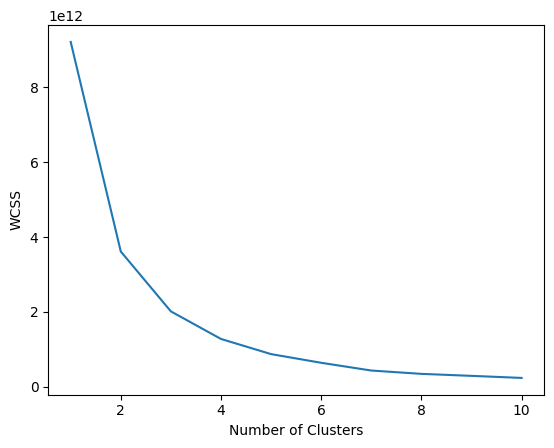

In [35]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans.fit(X_cluster)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [36]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

print(y_kmeans)
y_kmeans.shape

[0 0 2 ... 0 0 0]


(1460,)

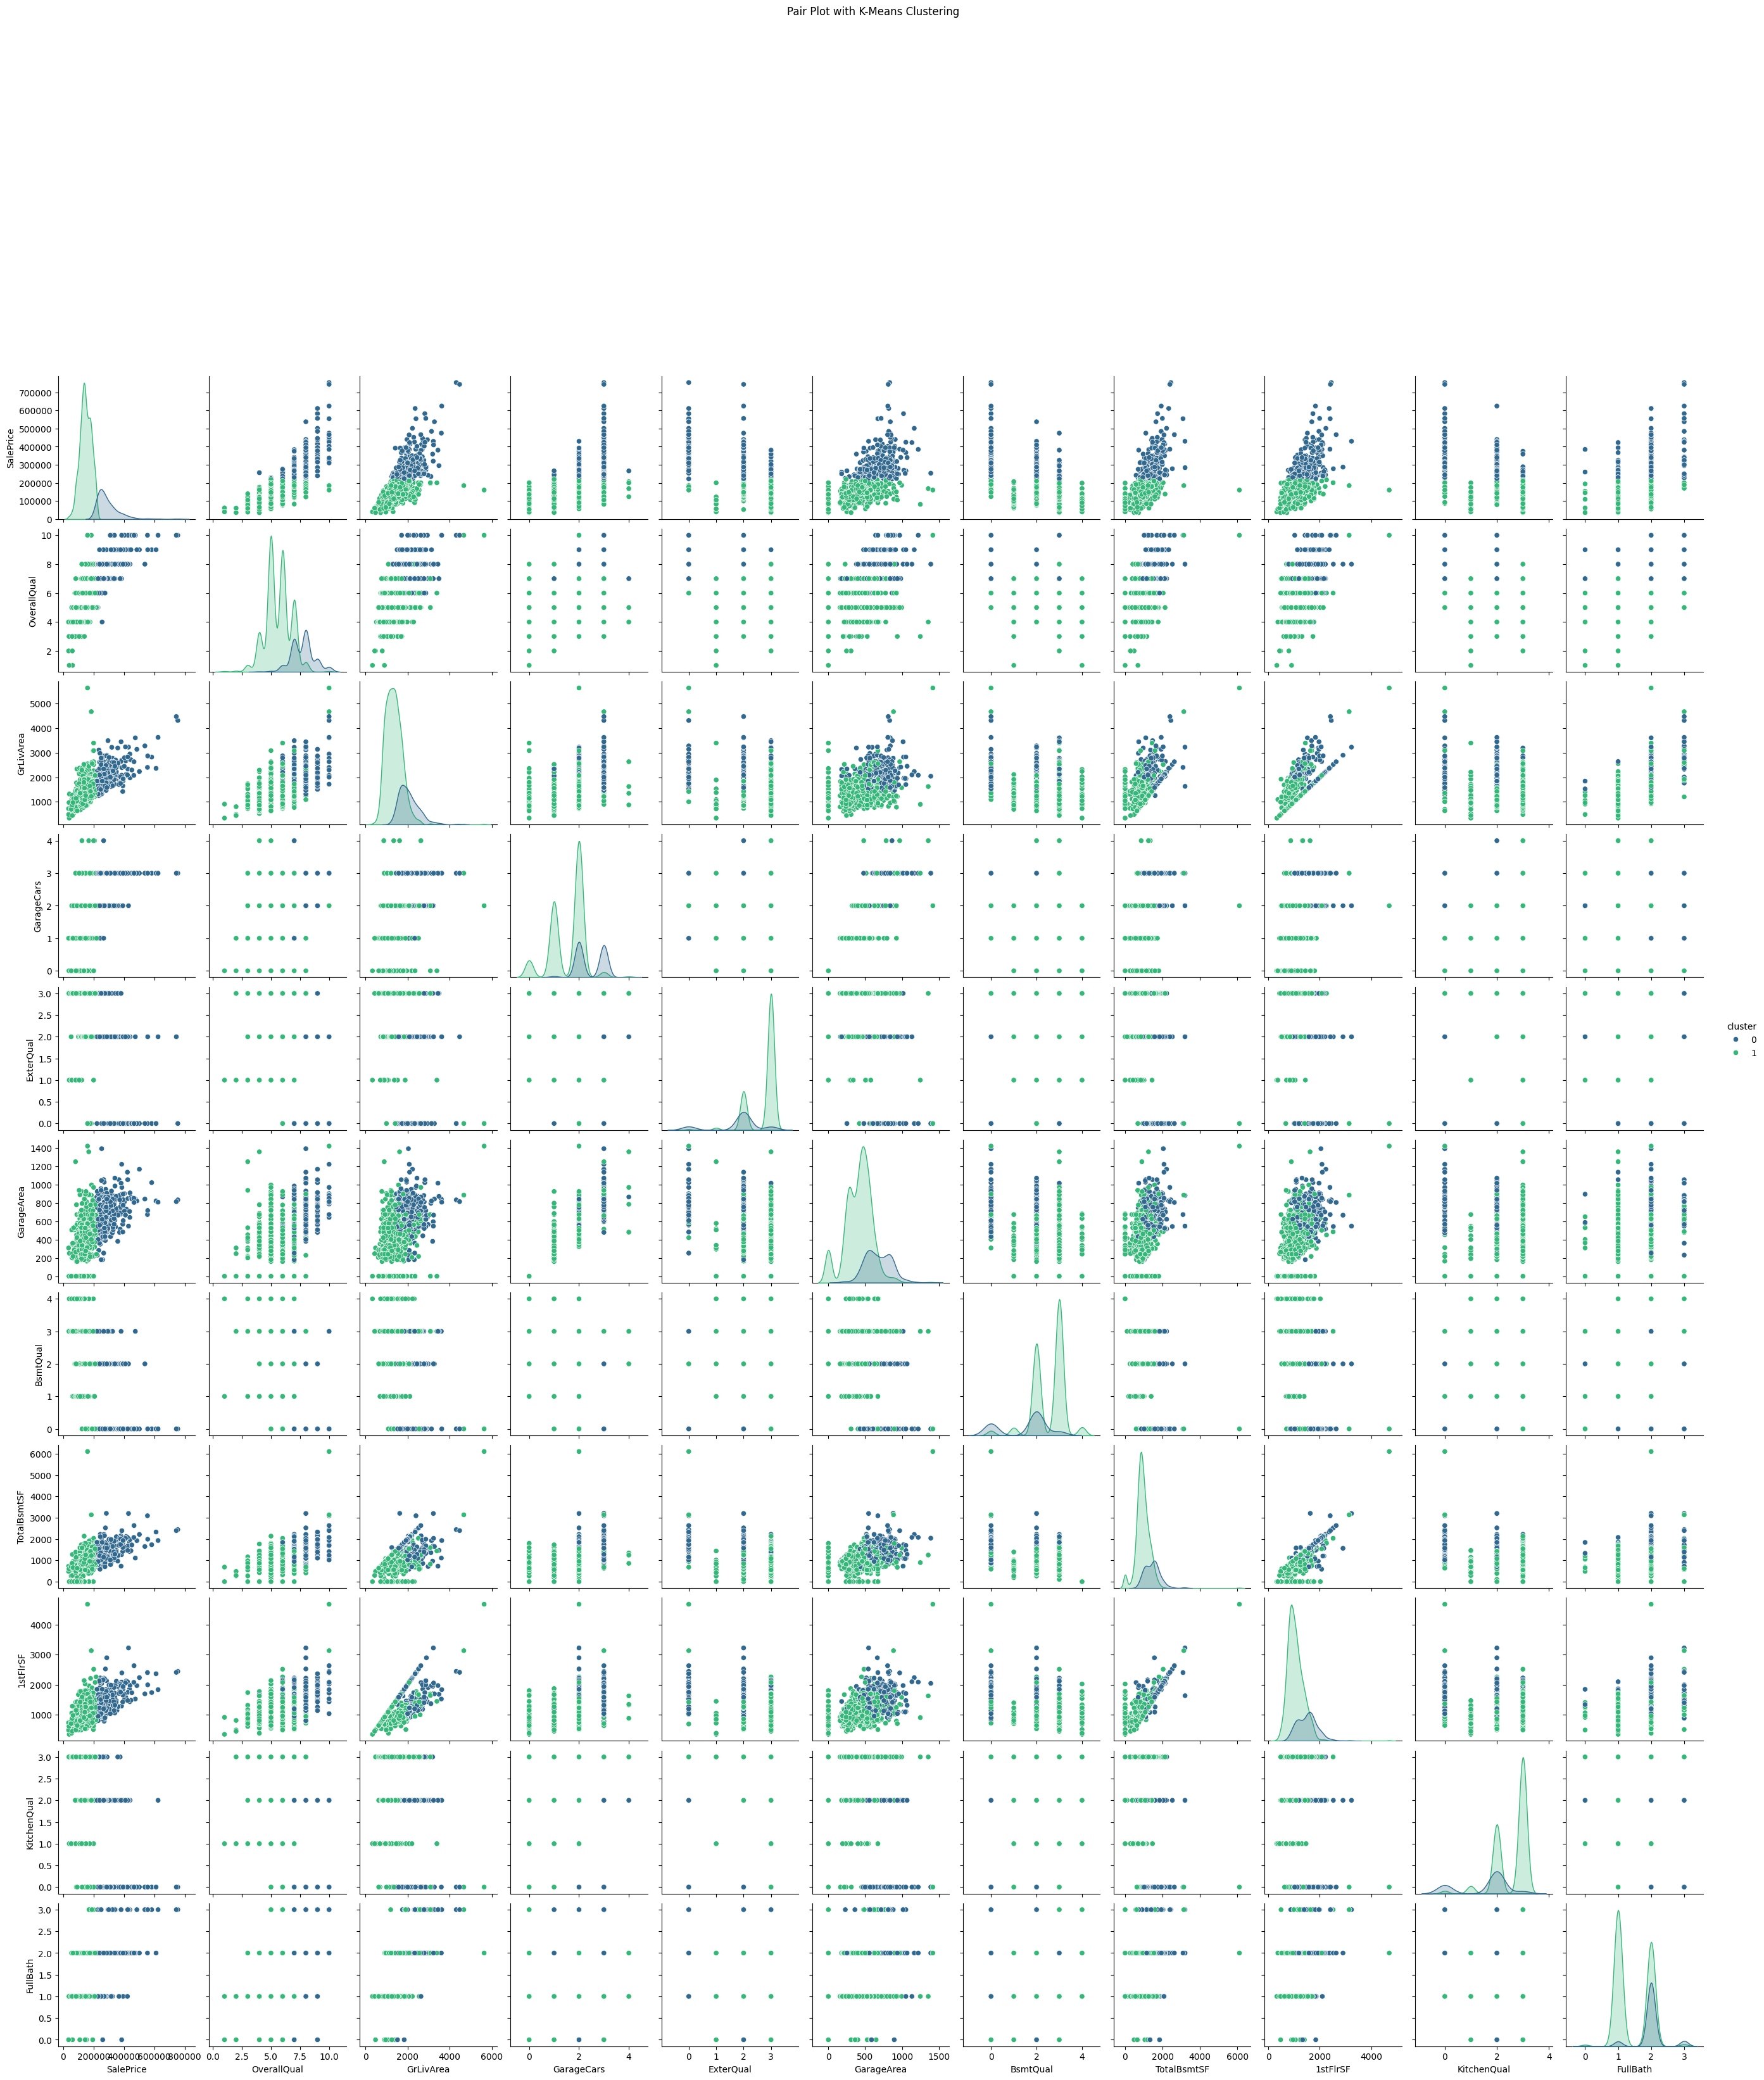

In [38]:

import seaborn as sns
from sklearn.cluster import KMeans
k = 2 
kmeans = KMeans(n_clusters=k, random_state=42)
df['cluster'] = kmeans.fit_predict(X_cluster)
sns.pairplot(df, vars=features, hue='cluster', palette='viridis')
plt.suptitle('Pair Plot with K-Means Clustering', y=1.2)
plt.show()


## making a gradio interface

In [39]:
d={}
D=df.drop(columns=["SalePrice","cluster"])
for column_name in D.columns:
    d[column_name]=D[column_name].mode().iloc[0]

In [40]:
features=['OverallQual', 'GrLivArea', 'GarageCars','GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath']

In [41]:
st= StandardScaler()
def predict_house_price(OverallQual, GrLivArea, GarageCars,GarageArea, TotalBsmtSF, stFlrSF, FullBath):
    temp=[float(OverallQual), float(GrLivArea), float(GarageCars),float(GarageArea), float(TotalBsmtSF), float(stFlrSF),float( FullBath)]
    l=[]
    global D
    s=D
    for index,i in enumerate(features):
        d[i]=temp[index]
    for column_name in D.columns:
        l.append(d[column_name])
    #input_features = np.array(l).reshape(1,-1)
    # D.loc[len(D)] = l
    # D = D.append(pd.Series(l, index=D.columns), ignore_index=True)
    s.loc[len(D.index)] = l


    s=st.fit_transform(s)
    input_features=s[-1]
    print(input_features)
    predicted_price = knnregressor.predict(input_features.reshape(1,-1))[0]

    return predicted_price
import gradio as gr
input_interface = gr.Interface(
    fn=predict_house_price,
    inputs=[
        gr.Textbox(type="text", label=f"{features[i]}") for i in range(len(features))
    ],
    outputs=gr.Textbox(label="Predicted House Price"),
    live=False
)

# Workaround to add a button and control output display:
iface = input_interface.launch()

# Access the button using its internal ID:
launch_button = iface._get_components()["launch_button"]  # Access button directly
launch_button.click()  # Simulate initial click to display inputs
launch_button.update(label="Get Sale Price")  # Update button label

c:\Users\dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


AttributeError: 'TupleNoPrint' object has no attribute '_get_components'